In [1]:
# Authors: Eric Larson <larson.eric.d@gmail.com>
#          Chris Holdgraf <choldgraf@gmail.com>
#
# License: BSD (3-clause)

import numpy as np
import matplotlib.pyplot as plt
from scipy.io import loadmat
import pickle
import mne
import nilearn.plotting as nl
import pandas as pd


print(__doc__)

/home/ungzs10/miniconda3/envs/ecog01/lib/python3.8/site-packages/nilearn/datasets/__init__.py:87: FutureWarning: Fetchers from the nilearn.datasets module will be updated in version 0.9 to return python strings instead of bytes and Pandas dataframes instead of Numpy arrays.
  warn("Fetchers from the nilearn.datasets module will be "


Automatically created module for IPython interactive environment


In [2]:
pat_ids = {
    'EC01':'a0f66459',
    'EC02':'c95c1e82',
    'EC03':'cb46fd46',
    'EC04':'fcb01f7a',
    'EC05':'ffb52f92',
    'EC06':'b4ac1726',
    'EC07':'f3b79359',
    'EC08':'ec761078',
    'EC09':'f0bbc9a9',
    'EC10':'abdb496b',
    'EC11':'ec168864',
    'EC12':'b45e3f7b'
}

pats_ids_in = pat_ids.keys()


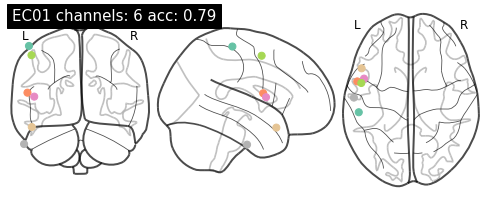

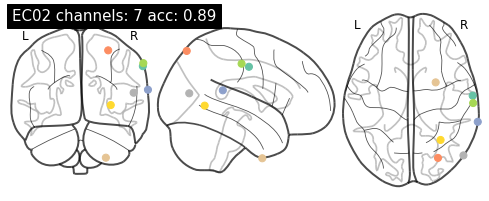

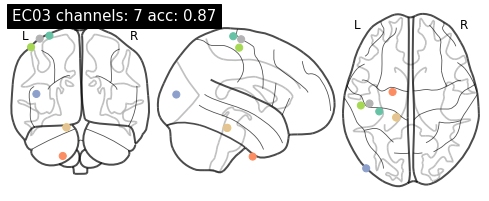

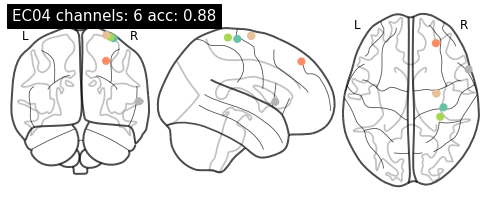

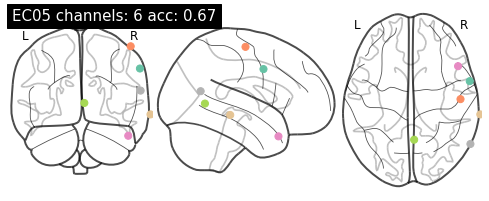

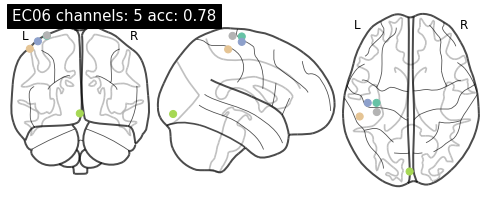

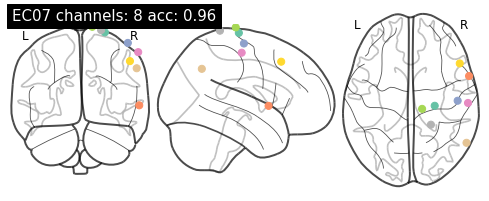

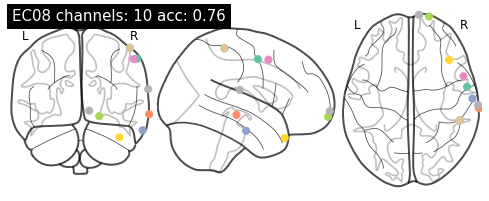

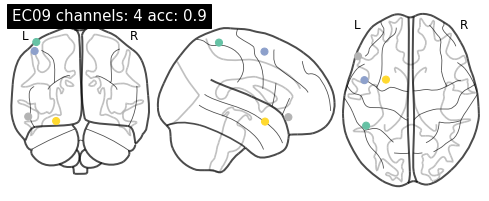

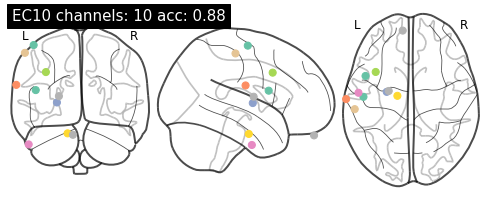

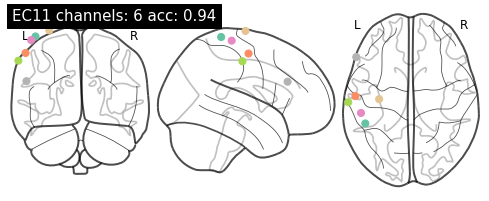

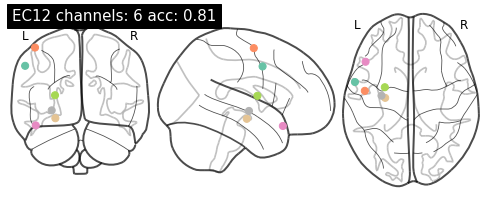

In [3]:
lp_base = '/media/ungzs10/F8426F05426EC7C8/Zsombi/MTA/ecog/trained_models/svm/HTNet_data/'
#lp = 'cikk/all_features_greedy/accs_all.pkl'
#lp = 'cikk/64_grid_decreased_ranges/accs_all.pkl'
lp = 'del/accs_all.pkl'

file = open(lp_base+lp, 'rb')
res_all = pickle.load(file)
file.close()

for pat_id in pat_ids:
    file = '/media/ungzs10/F8426F05426EC7C8/Zsombi/MTA/ecog/data/raw_data/naturalistic_move_v_rest/electrode_locations/ecog_metadata_{}.csv'.format(pat_ids[pat_id])
    df = pd.read_csv(file)
    ch_names = df['Unnamed: 0'].values.tolist()
    elec = np.asarray([[x,y,z] for x,y,z in zip(df['X'], df['Y'], df['Z'])])

    selected_elecs = res_all[pat_id]['greedy'][2]
    elec_temp = elec[selected_elecs,:]

    nl.plot_connectome(adjacency_matrix=np.eye(elec_temp.shape[0]),
                       node_coords=elec_temp,
                       title=pat_id+' channels: '+str(len(selected_elecs))+' acc: '
                             +str(round(res_all[pat_id]['greedy'][1][-1], 2))
                       )

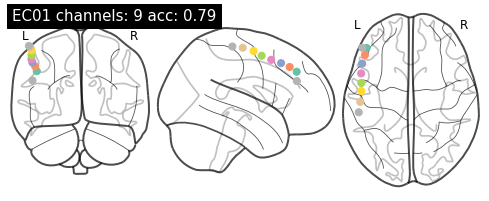

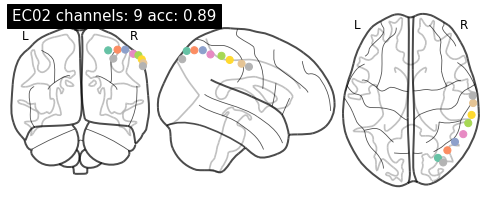

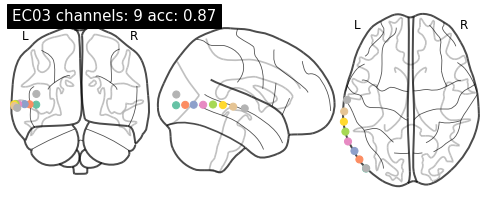

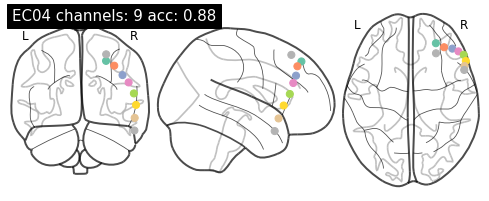

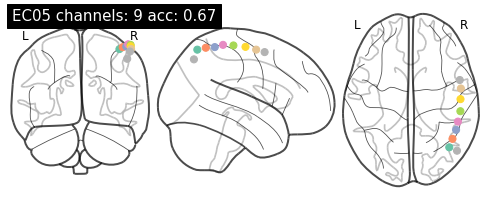

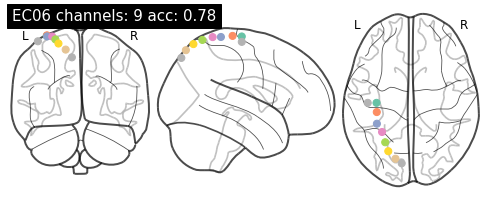

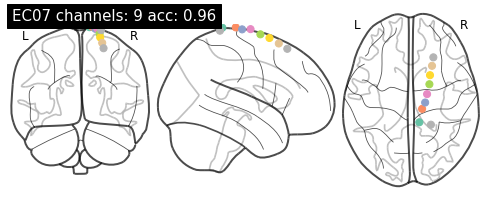

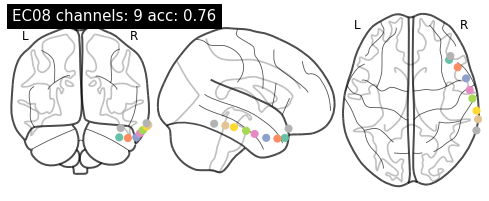

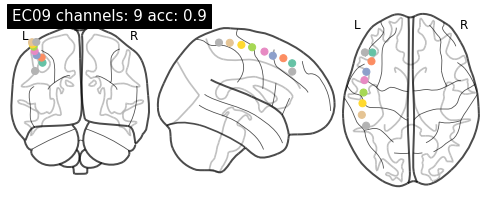

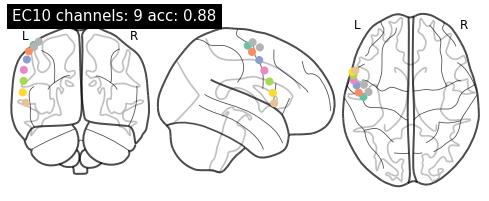

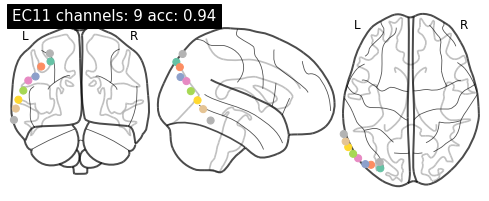

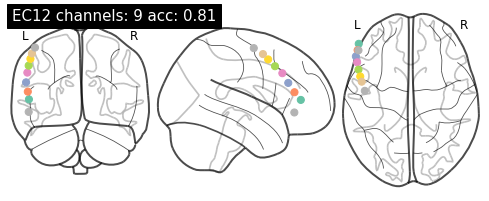

In [4]:
# read accuracies from file
file = open('/media/ungzs10/F8426F05426EC7C8/Zsombi/MTA/ecog/trained_models/svm/HTNet_data/del/accs_all.pkl', 'rb')
res_all = pickle.load(file)
file.close()

# plot with color
for pat_id in pat_ids:
    # read electrode locations from file
    file = '/media/ungzs10/F8426F05426EC7C8/Zsombi/MTA/ecog/data/raw_data/naturalistic_move_v_rest/electrode_locations/ecog_metadata_{}.csv'.format(pat_ids[pat_id])
    df = pd.read_csv(file)
    ch_names = df['Unnamed: 0'].values.tolist()
    elec = np.asarray([[x,y,z] for x,y,z in zip(df['X'], df['Y'], df['Z'])])

    # select electrodes by hand
    selected_elecs = [0,1,2,3,4,5,6,7,8]
    elec_temp = elec[selected_elecs,:]

    nl.plot_connectome(adjacency_matrix=np.eye(elec_temp.shape[0]),
                       node_coords=elec_temp,
                       title=pat_id+' channels: '+str(len(selected_elecs))+' acc: '
                             +str(round(res_all[pat_id]['greedy'][1][-1], 2))
                       )

EC01
EC01
EC01
EC01
EC03
EC03
EC03
EC03
EC03
EC03
EC03
EC03
EC03
EC03
EC03
EC03
EC03
EC03
EC03
EC03
EC12
EC12
EC12
EC12
EC12
EC12
EC12
EC12


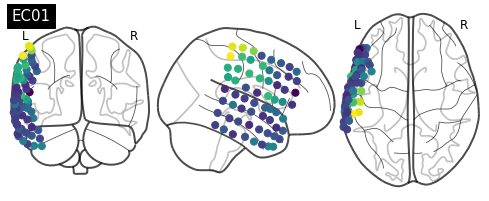

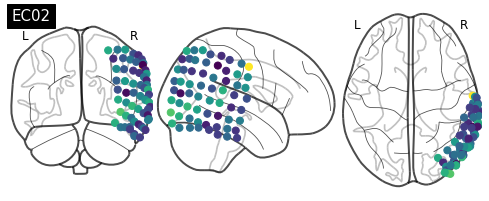

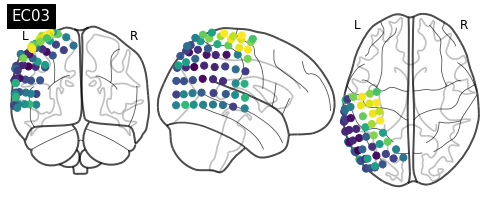

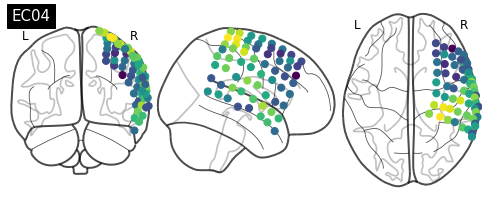

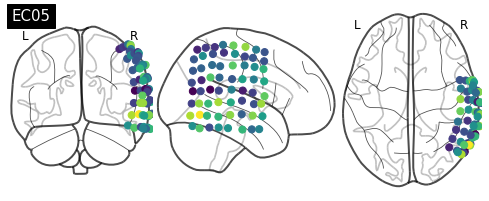

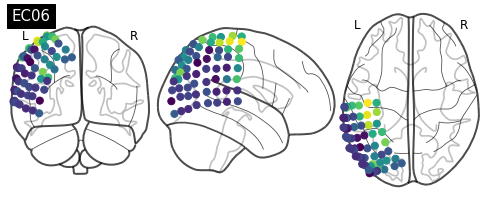

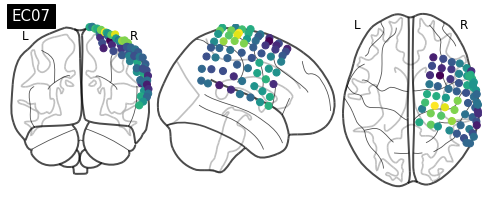

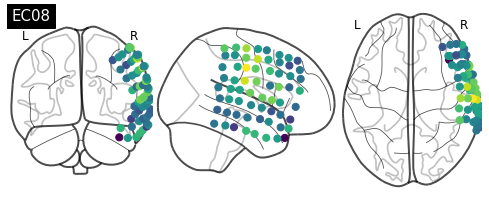

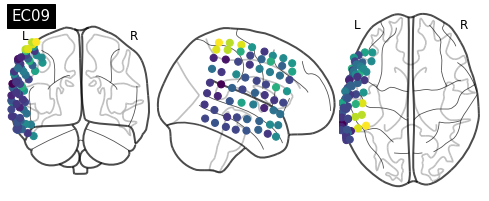

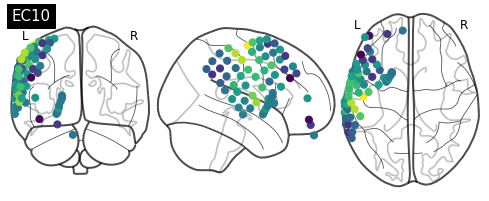

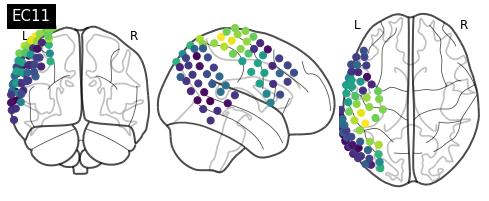

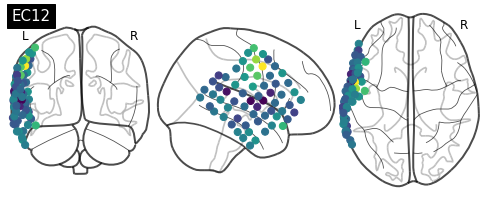

In [5]:
file = open('/media/ungzs10/F8426F05426EC7C8/Zsombi/MTA/ecog/trained_models/svm/HTNet_data/single_features/accs_all.pkl', 'rb')
res_all = pickle.load(file)
file.close()

for pat_id in pat_ids:
    file = '/media/ungzs10/F8426F05426EC7C8/Zsombi/MTA/ecog/data/raw_data/naturalistic_move_v_rest/electrode_locations/ecog_metadata_{}.csv'.format(pat_ids[pat_id])
    df = pd.read_csv(file)
    ch_names = df['Unnamed: 0'].values.tolist()
    elec = np.asarray([[x,y,z] for x,y,z in zip(df['X'], df['Y'], df['Z'])])
    elec = elec[:64,:]

    #selected_elecs = res_all[pat_id]['greedy'][2]
    #elec_temp = elec[selected_elecs,:]
    weights = [res for res in res_all[pat_id]['all_features']['test']['result']]
    #weights = np.asarray(weights)
    #norm = np.linalg.norm(weights)
    #weights_norm = weights/norm
    color = [[w, 0, 0, 1] for w in weights]
    while len(weights) < len(ch_names):
        color.append([0,0,0,1])
        weights.append(0)
        print(pat_id)
    nl.plot_connectome(adjacency_matrix=np.eye(elec.shape[0]),
                       node_coords=elec,
                       node_color=weights[:64],
                       title=pat_id)